# Plunger

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [96]:
def Inductor(x):
    L0 = 1
    h = 1
    x0 = 1
    L = L0/(1.+(x0+x)/h)
    Lp = -L0/h/(1+(x0+x)/h)**2
    return [L,Lp]
#
def f(t,y):
    x,v,q,I = y
    #
    E=1*np.sin(t)
    R=1
    c=1
    k=1
    m=1
    g=.1
    #
    L, Lp = Inductor(x)
    #
    dxdt = v
    dvdt = -k/m*x-g-c*v+Lp/2*I**2
    dqdt = I
    dIdt = -R/L*I+Lp/L*v*I+E/L
    return [dxdt,dvdt,dqdt,dIdt]

In [97]:
t0 = 0.
t1 = 1000.
t_span = [t0,t1]
t_eval = np.linspace(t0,t1,10000)
y0 = [.1,0.,0.,0.]
#
sol = solve_ivp(f,t_span,y0,t_eval = t_eval)

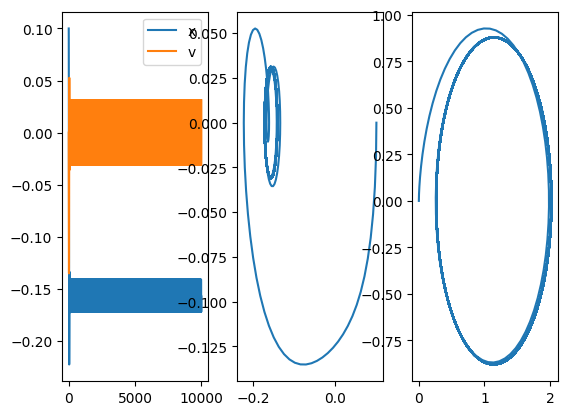

In [101]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
#
x = sol.y[0]
v = sol.y[1]
q = sol.y[2]
I = sol.y[3]
#
ax1.plot(x, label = 'x')
ax1.plot(v, label = 'v')
ax1.legend()
ax2.plot(x,v)
#
ax3.plot(q,I)

In [95]:
sol.y.shape

(4, 10000)